In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/matches.csv')

In [ ]:
df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [ ]:
df.shape

(756, 18)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [ ]:
#for checking the season
df['Season'].unique()

array(['IPL-2017', 'IPL-2008', 'IPL-2009', 'IPL-2010', 'IPL-2011',
       'IPL-2012', 'IPL-2013', 'IPL-2014', 'IPL-2015', 'IPL-2016',
       'IPL-2018', 'IPL-2019'], dtype=object)

In [ ]:
df['result'].unique()

array(['normal', 'tie', 'no result'], dtype=object)

In [ ]:
# Filter out rows with 'no result'
match_df = df[df['result'] != 'no result']

In [ ]:
match_df

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


In [ ]:
match_df.shape

(752, 18)

In [ ]:
match_df['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [ ]:
#Combinding the below two combinations of team..
#Deccan Chargers --> Sunrisers Hyderabad
#Delhi Daredevils --> Delhi Capitals
match_df.loc[:, 'team1'].replace({'Deccan Chargers': 'Sunrisers Hyderabad', 'Delhi Daredevils': 'Delhi Capitals'}, inplace=True)
match_df.loc[:, 'team2'].replace({'Deccan Chargers': 'Sunrisers Hyderabad', 'Delhi Daredevils': 'Delhi Capitals'}, inplace=True)

<ipython-input-20-af3c49d02b63>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  match_df.loc[:, 'team1'].replace({'Deccan Chargers': 'Sunrisers Hyderabad', 'Delhi Daredevils': 'Delhi Capitals'}, inplace=True)
<ipython-input-20-af3c49d02b63>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  match_df.loc[:, 'team2'].replace({'Deccan Chargers': 'Sunrisers Hyderabad', 'Delhi Daredevils': 'Delhi Capitals'}, inplace=True)


In [ ]:
unique_team1 = match_df['team1'].unique()
unique_team2 = match_df['team2'].unique()
unique_team2
unique_team1

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Capitals', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Kochi Tuskers Kerala',
       'Pune Warriors', 'Rising Pune Supergiants'], dtype=object)

In [ ]:
deprecated_teams = ['Rising Pune Supergiant', 'Gujarat Lions', 'Pune Warriors', 'Kochi Tuskers Kerala', 'Rising Pune Supergiants']
match_df = match_df[~match_df['team1'].isin(deprecated_teams)]
match_df = match_df[~match_df['team2'].isin(deprecated_teams)]

In [ ]:
match_df.shape

(638, 18)

<Axes: xlabel='team', ylabel='total_count'>

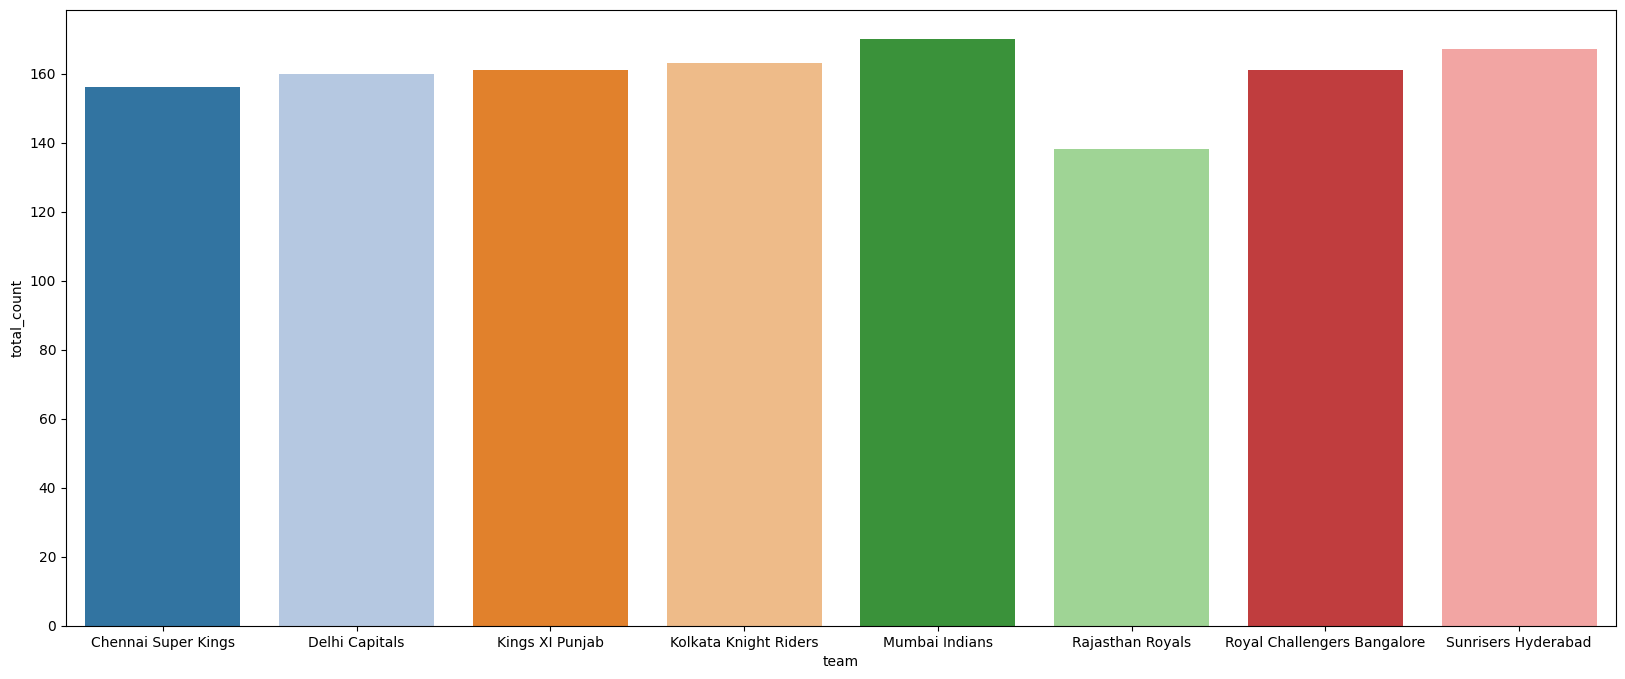

In [ ]:
team1_df = pd.DataFrame({'home_count': match_df.groupby(['team1'])['id'].count()})
team1_df.reset_index(inplace = True)
team1_df.columns = ['team', 'home_count']

team2_df = pd.DataFrame({'away_count': match_df.groupby(['team2'])['id'].count()})
team2_df.reset_index(inplace = True)
team2_df.columns = ['team', 'away_count']

team_count_df = pd.merge(team1_df, team2_df, on = 'team')

team_count_df['total_count'] = team_count_df['home_count'] + team_count_df['away_count']

plt.figure(figsize=(20, 8))
sns.barplot(x = 'team', y = 'total_count', data = team_count_df, palette = 'tab20')

THE VALUE OF **K** = 30

In [ ]:
def calculate_elo(team1_rating, team2_rating, winner = 'team1', k = 30):
    team1_prob = team1_rating / (team1_rating + team2_rating)
    team2_prob = team2_rating / (team1_rating + team2_rating)

    if winner == 'team1':
        team1_rating = round(team1_rating + k * (1 - team1_prob))
        team2_rating = round(team2_rating + k * (0 - team2_prob))
    else:
        team1_rating = round(team1_rating + k * (0 - team1_prob))
        team2_rating = round(team2_rating + k * (1 - team2_prob))


    return (team1_rating, team2_rating)

***************** ELO RATINGS OF TEAM AFTER IPL-2008 ******************


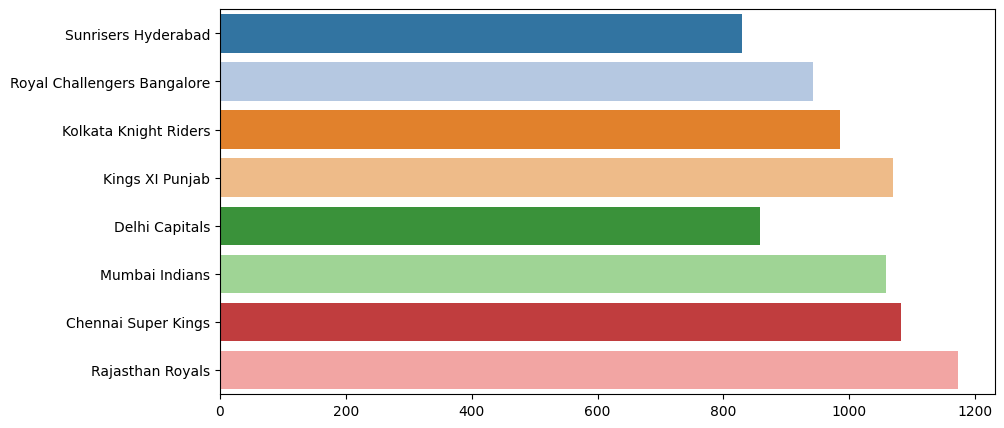

***************** ELO RATINGS OF TEAM AFTER IPL-2009 ******************


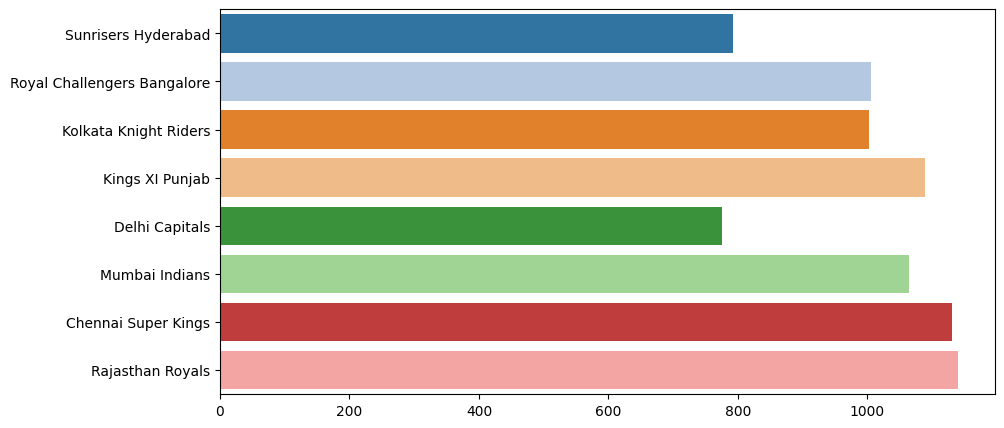

***************** ELO RATINGS OF TEAM AFTER IPL-2010 ******************


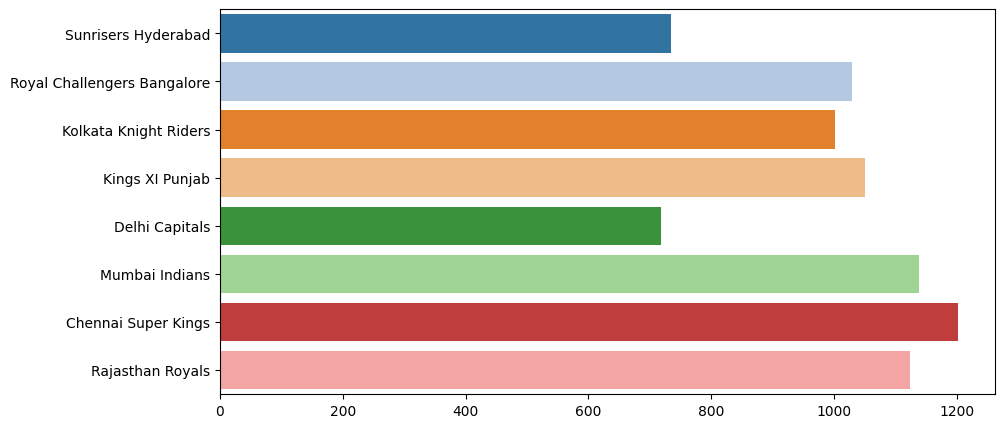

***************** ELO RATINGS OF TEAM AFTER IPL-2011 ******************


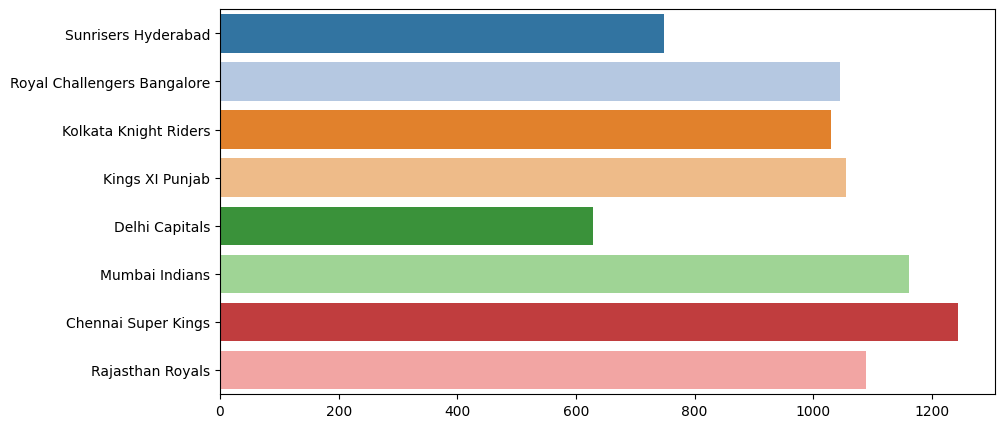

***************** ELO RATINGS OF TEAM AFTER IPL-2012 ******************


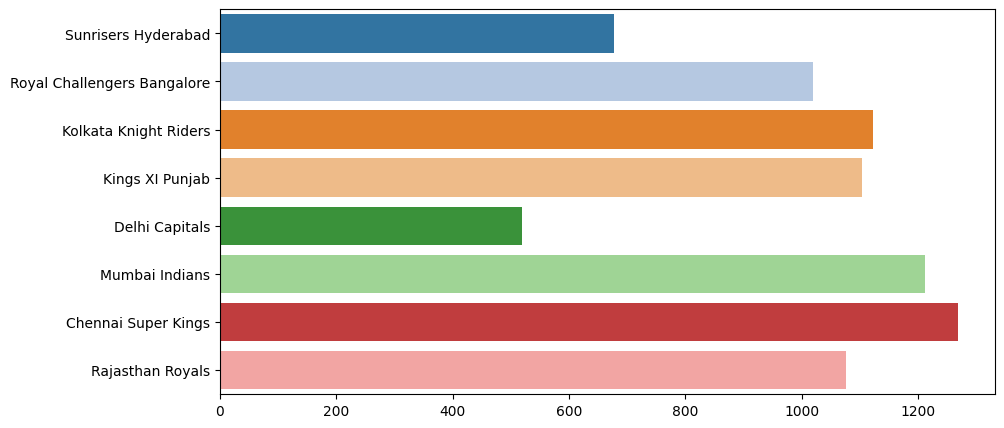

***************** ELO RATINGS OF TEAM AFTER IPL-2013 ******************


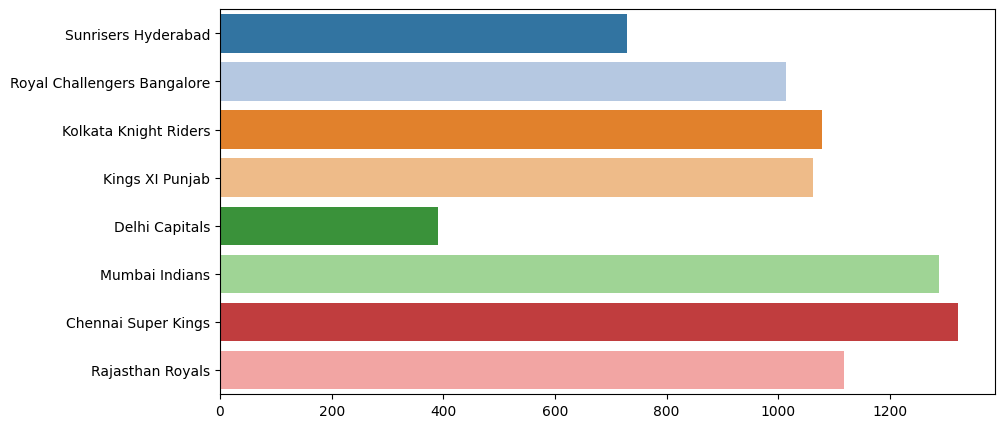

***************** ELO RATINGS OF TEAM AFTER IPL-2014 ******************


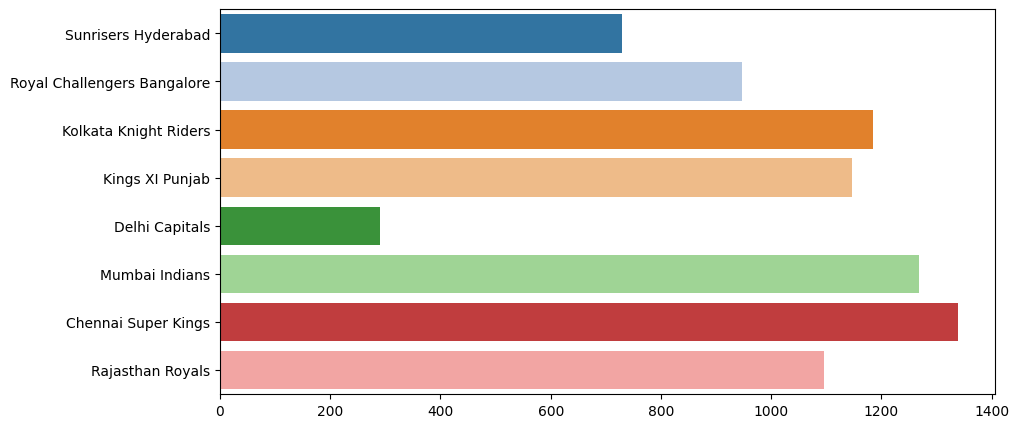

***************** ELO RATINGS OF TEAM AFTER IPL-2015 ******************


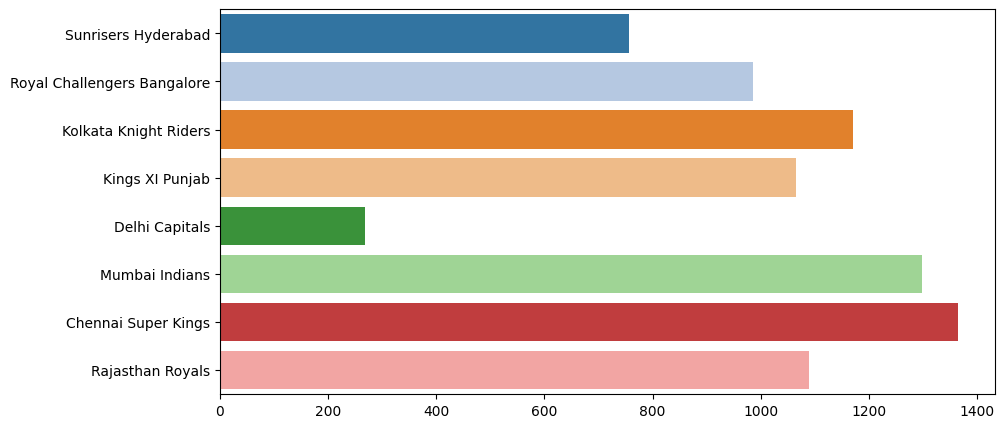

***************** ELO RATINGS OF TEAM AFTER IPL-2016 ******************


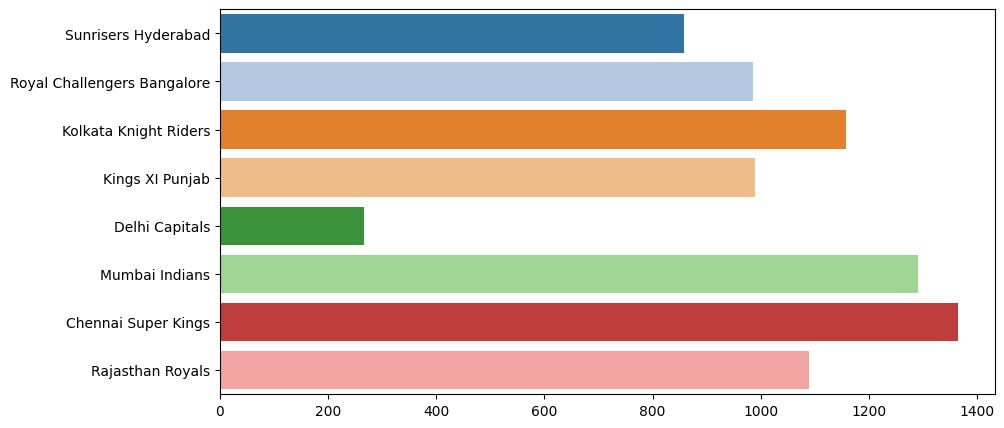

***************** ELO RATINGS OF TEAM AFTER IPL-2017 ******************


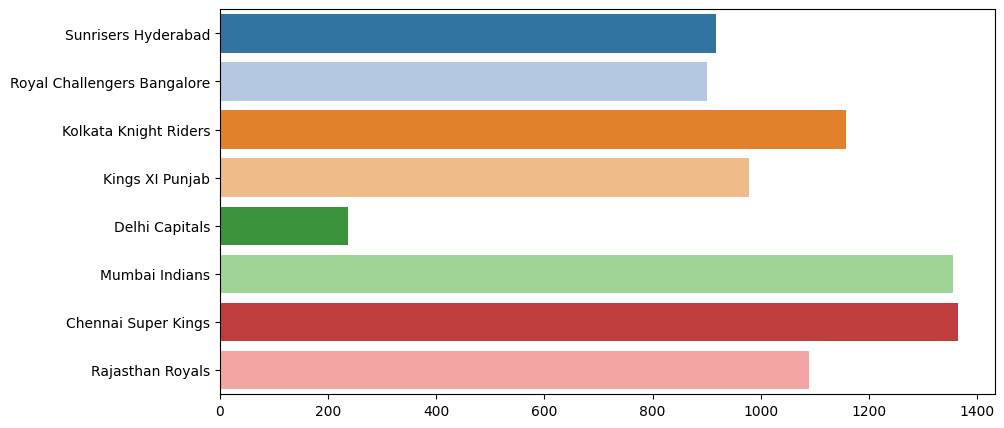

***************** ELO RATINGS OF TEAM AFTER IPL-2018 ******************


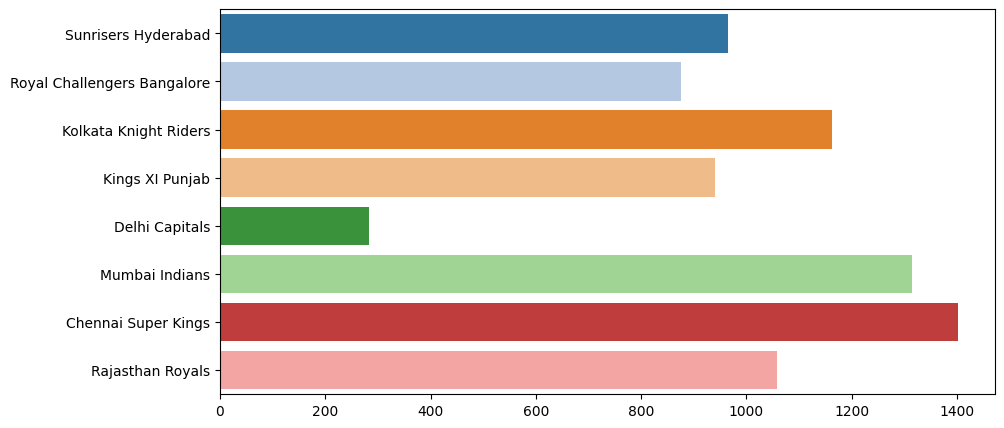

***************** ELO RATINGS OF TEAM AFTER IPL-2019 ******************


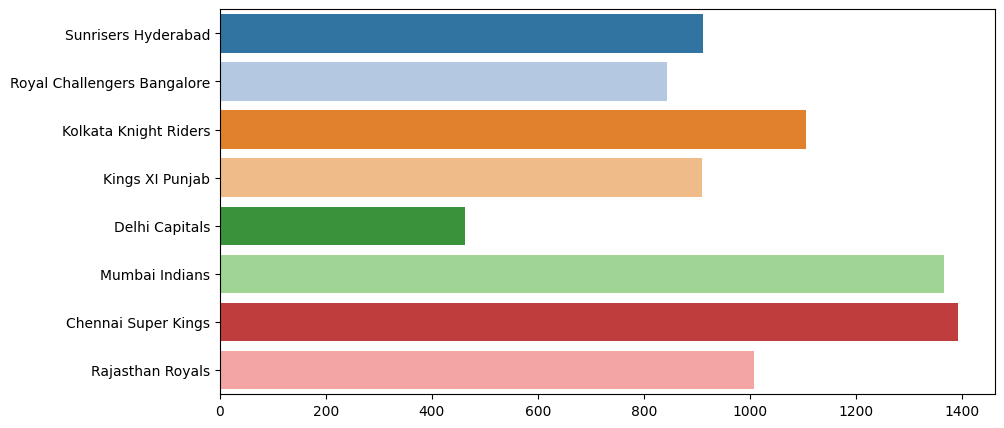

In [ ]:
unique_team_list = list(match_df['team1'].unique())
rating_dict = dict()

for team in unique_team_list:
    rating_dict[team] = 1000


k = 30

''' lets analysize season wise.. '''

season_list = ['IPL-2008', 'IPL-2009', 'IPL-2010', 'IPL-2011',
       'IPL-2012', 'IPL-2013', 'IPL-2014', 'IPL-2015', 'IPL-2016', 'IPL-2017',
       'IPL-2018', 'IPL-2019']

for season in season_list:
    print("***************** ELO RATINGS OF TEAM AFTER "+ season + " ******************")
    match_temp = match_df[match_df['Season'] == season][['team1', 'team2', 'winner']]

    for index, row in match_temp.iterrows():
        team1 = row['team1']
        team2 = row['team2']
        winner_team = row['winner']

        team1_rating = rating_dict[team1]
        team2_rating = rating_dict[team2]
        winner = 'team1'

        if winner_team == team2:
            winner = 'team2'

        team1_rating, team2_rating = calculate_elo(team1_rating, team2_rating, winner, k)

        rating_dict[team1] = team1_rating
        rating_dict[team2] = team2_rating

    keys = list(rating_dict.keys())
    values = list(rating_dict.values())
    plt.figure(figsize=(10, 5))
    sns.barplot(y = keys, x = values, palette = 'tab20')
    plt.show()